In [ ]:
# Machine Learning Practical: Coursework 1

**Release date: Monday 10th October 2016**  
**Due date: 16:00 Thursday 27th October 2016**

Instructions for the coursework are [available as a PDF here](http://www.inf.ed.ac.uk/teaching/courses/mlp/2016/coursework_1.pdf).

## Part 1: Learning rate schedules

In [68]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

In [69]:
print len(train_data.inputs)
print (train_data.num_classes)
print (train_data.batch_size)
print (train_data.num_batches)
print valid_data.num_batches

50000
10
50
1000
200


In [70]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit

input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.initialisers import UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.data_providers import MNISTDataProvider
from mlp.optimisers import Optimiser
from mlp.schedulers import ConstantLearningRateScheduler
import mlp.schedulers as sche
from mlp.learning_rules import MomentumLearningRule
import mlp.learning_rules as lr
#from mlp.schedulers import RangedScheduler

/Users/hanzcuevas/miniconda2/envs/mlp/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [72]:
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, schedulers, stats_interval):
    #r=0.1
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    #learning_rate = 0.2
    # Use the created objects to initialise a new Optimiser instance.
    #schedulers = [sche.VarLearningRateScheduler(learning_rate,r)]
    #schedulers = [sche.ConstantLearningRateScheduler(learning_rate)]
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, schedulers)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    #fig_1.savefig('var_ErrorovTrain_5000.png',dpi =200)
    #fig_2.savefig('var_ACC_5000.png',dpi =200)
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

--------------------------------------------------------------------------------
learning_rate=0.0010 R=784.0000
--------------------------------------------------------------------------------


Epoch 5: 0.88s to complete
    error(train)=2.25e+00, acc(train)=2.75e-01, error(valid)=2.25e+00, acc(valid)=2.77e-01
Epoch 10: 0.98s to complete
    error(train)=2.18e+00, acc(train)=4.28e-01, error(valid)=2.18e+00, acc(valid)=4.35e-01
Epoch 15: 0.91s to complete
    error(train)=2.09e+00, acc(train)=5.37e-01, error(valid)=2.09e+00, acc(valid)=5.51e-01
Epoch 20: 0.92s to complete
    error(train)=1.95e+00, acc(train)=5.81e-01, error(valid)=1.95e+00, acc(valid)=5.97e-01
Epoch 25: 0.90s to complete
    error(train)=1.78e+00, acc(train)=6.15e-01, error(valid)=1.77e+00, acc(valid)=6.34e-01
Epoch 30: 0.93s to complete
    error(train)=1.58e+00, acc(train)=6.50e-01, error(valid)=1.57e+00, acc(valid)=6.74e-01
Epoch 35: 0.89s to complete
    error(train)=1.39e+00, acc(train)=6.74e-01, error(valid)=1.37e+00, acc(valid)=7.00e-01
Epoch 40: 0.97s to complete
    error(train)=1.23e+00, acc(train)=7.00e-01, error(valid)=1.21e+00, acc(valid)=7.25e-01
Epoch 45: 0.91s to complete
    error(train)=1.10

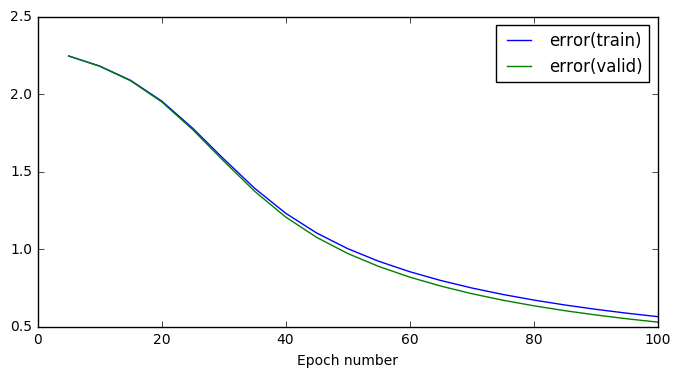

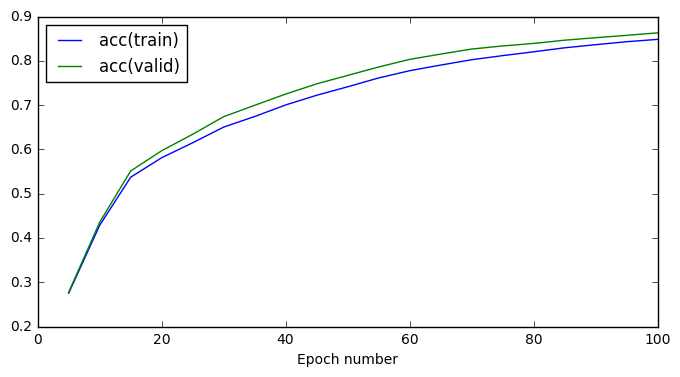

    final error(train) = 5.64e-01
    final error(valid) = 5.28e-01
    final acc(train)   = 8.48e-01
    final acc(valid)   = 8.63e-01
    run time per epoch = 1.05s


In [73]:
# Set training run hyperparameters
batch_size = 50  # number of data points in a batch
num_epochs = 100  # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats
learning_rateLL = [1e-3]  # learning rate for gradient descent
init_scales = [0.1]#, 0.2, 0.5, 1.]  # scale for random parameter initialisation
ere = [input_dim]
final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []
n = 1
for learning_rate in learning_rateLL:
    for r in ere:
        print('-' * 80)
        print('learning_rate={0:.4f} R={1:.4f}'
              .format(learning_rate, r))
        print('-' * 80)
        # Reset random number generator and data provider states on each run
        # to ensure reproducibility of results
        rng.seed(seed)
        train_data.reset()
        valid_data.reset()

        # Alter data-provider batch size
        train_data.batch_size = batch_size 
        valid_data.batch_size = batch_size

        # Create a parameter initialiser which will sample random uniform values
        # from [-init_scale, init_scale]
        #param_init = UniformInit(-init_scale, init_scale, rng=rng)

        # Create a model with three affine layers
        #hidden_dim = 100
        model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
        ])

        # Initialise a cross entropy error object
        error = CrossEntropySoftmaxError()
        #schedulers = [sche.VarLearningRateScheduler(learning_rate,r)]
        schedulers = [sche.ConstantLearningRateScheduler(learning_rate)]
        # Use a basic gradient descent learning rule
        learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2= train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, schedulers, stats_interval)

        plt.show()

        print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
        print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
        print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
        print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
        print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

        final_errors_train.append(stats[-1, keys['error(train)']])
        final_errors_valid.append(stats[-1, keys['error(valid)']])
        final_accs_train.append(stats[-1, keys['acc(train)']])
        final_accs_valid.append(stats[-1, keys['acc(valid)']])

In [ ]:
    final error(train) = 5.64e-01
    final error(valid) = 5.28e-01
    final acc(train)   = 8.48e-01
    final acc(valid)   = 8.63e-01
    run time per epoch = 1.08s

--------------------------------------------------------------------------------
learning_rate=0.0010 R=50000.0000
--------------------------------------------------------------------------------


Epoch 5: 0.90s to complete
    error(train)=2.27e+00, acc(train)=1.75e-01, error(valid)=2.27e+00, acc(valid)=1.73e-01
Epoch 10: 0.87s to complete
    error(train)=2.25e+00, acc(train)=2.49e-01, error(valid)=2.25e+00, acc(valid)=2.46e-01
Epoch 15: 0.91s to complete
    error(train)=2.23e+00, acc(train)=3.18e-01, error(valid)=2.23e+00, acc(valid)=3.18e-01
Epoch 20: 0.94s to complete
    error(train)=2.21e+00, acc(train)=3.85e-01, error(valid)=2.21e+00, acc(valid)=3.92e-01
Epoch 25: 1.02s to complete
    error(train)=2.18e+00, acc(train)=4.26e-01, error(valid)=2.18e+00, acc(valid)=4.35e-01
Epoch 30: 1.05s to complete
    error(train)=2.15e+00, acc(train)=4.73e-01, error(valid)=2.15e+00, acc(valid)=4.85e-01
Epoch 35: 0.99s to complete
    error(train)=2.12e+00, acc(train)=5.05e-01, error(valid)=2.12e+00, acc(valid)=5.14e-01
Epoch 40: 0.96s to complete
    error(train)=2.08e+00, acc(train)=5.35e-01, error(valid)=2.08e+00, acc(valid)=5.49e-01
Epoch 45: 0.98s to complete
    error(train)=2.04

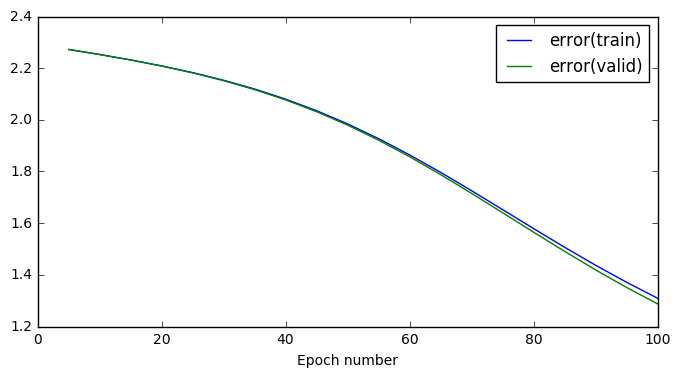

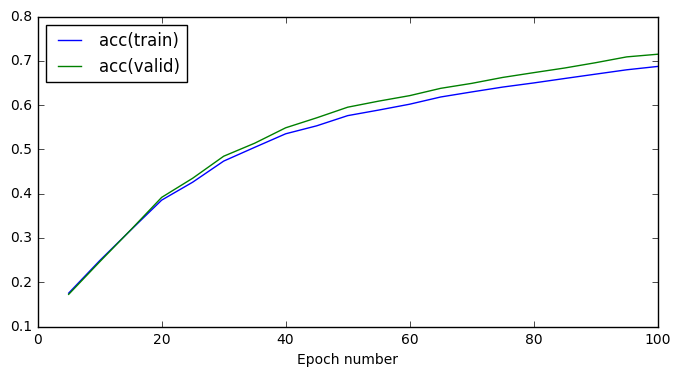

    final error(train) = 1.31e+00
    final error(valid) = 1.29e+00
    final acc(train)   = 6.87e-01
    final acc(valid)   = 7.15e-01
    run time per epoch = 1.09s


In [64]:
# Set training run hyperparameters
batch_size = 50  # number of data points in a batch
num_epochs = 100  # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats
learning_rateLL = [1e-3]  # learning rate for gradient descent
init_scales = [0.1]#, 0.2, 0.5, 1.]  # scale for random parameter initialisation
ere = [50000]#[input_dim]
final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

for learning_rate in learning_rateLL:
    for r in ere:
        print('-' * 80)
        print('learning_rate={0:.4f} R={1:.4f}'
              .format(learning_rate, r))
        print('-' * 80)
        # Reset random number generator and data provider states on each run
        # to ensure reproducibility of results
        rng.seed(seed)
        train_data.reset()
        valid_data.reset()

        # Alter data-provider batch size
        train_data.batch_size = batch_size 
        valid_data.batch_size = batch_size

        # Create a parameter initialiser which will sample random uniform values
        # from [-init_scale, init_scale]
        #param_init = UniformInit(-init_scale, init_scale, rng=rng)

        # Create a model with three affine layers
        #hidden_dim = 100
        model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
        ])

        # Initialise a cross entropy error object
        error = CrossEntropySoftmaxError()
        schedulers = [sche.VarLearningRateScheduler(learning_rate,r)]
        #schedulers = [sche.ConstantLearningRateScheduler(learning_rate)]
        # Use a basic gradient descent learning rule
        learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2= train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, schedulers, stats_interval)

        plt.show()

        print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
        print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
        print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
        print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
        print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

        final_errors_train.append(stats[-1, keys['error(train)']])
        final_errors_valid.append(stats[-1, keys['error(valid)']])
        final_accs_train.append(stats[-1, keys['acc(train)']])
        final_accs_valid.append(stats[-1, keys['acc(valid)']])

## Part 2: Momentum learning rule

In [1]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

In [2]:
print len(train_data.inputs)

50000


In [3]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit

input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

In [4]:
from mlp.learning_rules import MomentumLearningRule
import mlp.learning_rules as lr

In [36]:
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, schedulers, stats_interval):
    r=10
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    #learning_rate = 0.2
    # Use the created objects to initialise a new Optimiser instance.
    
    #schedulers = [sche.ConstantLearningRateScheduler(learning_rate)]
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, schedulers)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    fig_1.savefig('tauErrorovTrain_4.png',dpi =200)
    fig_2.savefig('tauconstant_ACC_4.png',dpi =200)
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

--------------------------------------------------------------------------------
learning_rate=0.0010 Mom=0.5000
--------------------------------------------------------------------------------


Epoch 5: 0.88s to complete
    error(train)=2.18e+00, acc(train)=4.53e-01, error(valid)=2.18e+00, acc(valid)=4.65e-01
Epoch 10: 0.96s to complete
    error(train)=1.95e+00, acc(train)=5.75e-01, error(valid)=1.95e+00, acc(valid)=5.91e-01
Epoch 15: 0.88s to complete
    error(train)=1.58e+00, acc(train)=6.55e-01, error(valid)=1.57e+00, acc(valid)=6.79e-01
Epoch 20: 0.89s to complete
    error(train)=1.23e+00, acc(train)=6.98e-01, error(valid)=1.21e+00, acc(valid)=7.24e-01
Epoch 25: 0.90s to complete
    error(train)=1.00e+00, acc(train)=7.41e-01, error(valid)=9.71e-01, acc(valid)=7.67e-01
Epoch 30: 0.91s to complete
    error(train)=8.54e-01, acc(train)=7.76e-01, error(valid)=8.19e-01, acc(valid)=8.02e-01
Epoch 35: 0.91s to complete
    error(train)=7.49e-01, acc(train)=8.02e-01, error(valid)=7.12e-01, acc(valid)=8.25e-01
Epoch 40: 0.90s to complete
    error(train)=6.71e-01, acc(train)=8.21e-01, error(valid)=6.34e-01, acc(valid)=8.40e-01
Epoch 45: 0.91s to complete
    error(train)=6.11

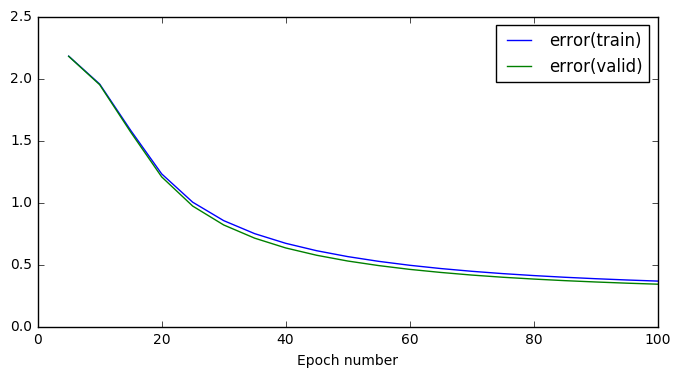

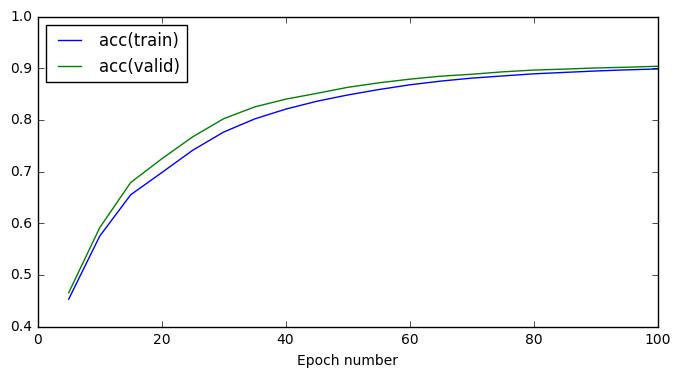

    final error(train) = 3.66e-01
    final error(valid) = 3.41e-01
    final acc(train)   = 8.98e-01
    final acc(valid)   = 9.04e-01
    run time per epoch = 1.03s


In [7]:
# Set training run hyperparameters
batch_size = 50  # number of data points in a batch
num_epochs = 100  # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats
learning_rate = 1e-3  # learning rate for gradient descent
r=10
mom_coeff=0.5
init_scales = [0.1]#0.1, 0.2, 0.5, 1.]  # scale for random parameter initialisation
final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

for init_scale in init_scales:

    print('-' * 80)
    print('learning_rate={0:.4f} Mom={1:.4f}'
          .format(learning_rate, mom_coeff))
    print('-' * 80)
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    # Create a parameter initialiser which will sample random uniform values
    # from [-init_scale, init_scale]
    #param_init = UniformInit(-init_scale, init_scale, rng=rng)

    # Create a model with three affine layers
    #hidden_dim = 100
    model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

    # Initialise a cross entropy error object
    error = CrossEntropySoftmaxError()
    schedulers = [sche.ConstantLearningRateScheduler(learning_rate)]
    # Use a basic gradient descent learning rule
    #learning_ruleG = GradientDescentLearningRule(learning_rate=learning_rate)
    learning_rule = lr.MomentumLearningRule(learning_rate=learning_rate, mom_coeff=mom_coeff)#learning_ruleG
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2= train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, schedulers, stats_interval)

    plt.show()

    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])

In [ ]:
final error(train) = 3.66e-01
    final error(valid) = 3.41e-01
    final acc(train)   = 8.98e-01
    final acc(valid)   = 9.04e-01
    run time per epoch = 1.15s

--------------------------------------------------------------------------------
learning_rate=0.0010 mom_coeff=0.9000
--------------------------------------------------------------------------------


Epoch 5: 0.99s to complete
    error(train)=1.79e+00, acc(train)=6.32e-01, error(valid)=1.78e+00, acc(valid)=6.53e-01
Epoch 10: 0.91s to complete
    error(train)=9.20e-01, acc(train)=7.70e-01, error(valid)=8.86e-01, acc(valid)=7.98e-01
Epoch 15: 0.98s to complete
    error(train)=6.17e-01, acc(train)=8.36e-01, error(valid)=5.80e-01, acc(valid)=8.52e-01
Epoch 20: 0.91s to complete
    error(train)=4.79e-01, acc(train)=8.72e-01, error(valid)=4.47e-01, acc(valid)=8.82e-01
Epoch 25: 0.94s to complete
    error(train)=4.06e-01, acc(train)=8.90e-01, error(valid)=3.78e-01, acc(valid)=8.96e-01
Epoch 30: 0.94s to complete
    error(train)=3.64e-01, acc(train)=8.99e-01, error(valid)=3.39e-01, acc(valid)=9.05e-01
Epoch 35: 0.91s to complete
    error(train)=3.37e-01, acc(train)=9.05e-01, error(valid)=3.14e-01, acc(valid)=9.12e-01
Epoch 40: 0.92s to complete
    error(train)=3.16e-01, acc(train)=9.11e-01, error(valid)=2.95e-01, acc(valid)=9.17e-01
Epoch 45: 0.95s to complete
    error(train)=2.99

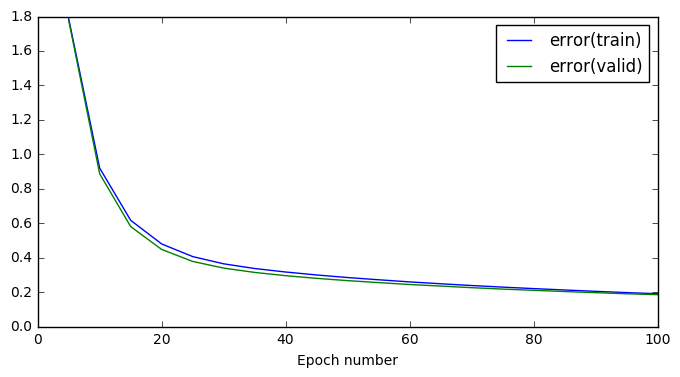

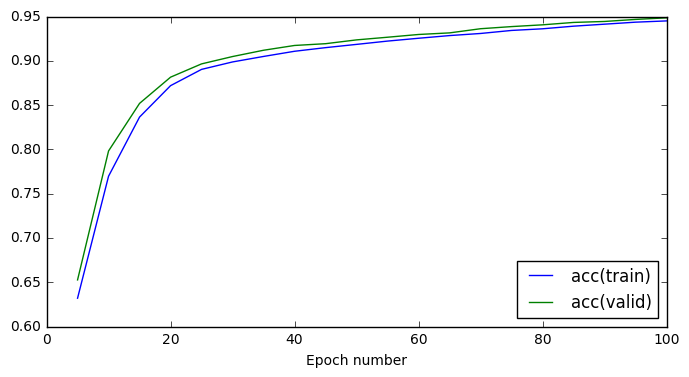

    final error(train) = 1.90e-01
    final error(valid) = 1.85e-01
    final acc(train)   = 9.45e-01
    final acc(valid)   = 9.48e-01
    run time per epoch = 1.16s


In [37]:
# Set training run hyperparameters
batch_size = 50  # number of data points in a batch
num_epochs = 100  # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats
learning_rate = 1e-3 # learning rate for gradient descent
#r=10
mom_coeff = 0.9
tau = 7
gamma = 1
init_scales = [1.]#0.1, 0.2, 0.5, 1.]  # scale for random parameter initialisation
final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

for init_scale in init_scales:

    print('-' * 80)
    print('learning_rate={0:.4f} mom_coeff={1:.4f}'
          .format(learning_rate, mom_coeff))
    print('-' * 80)
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    # Create a parameter initialiser which will sample random uniform values
    # from [-init_scale, init_scale]
    #param_init = UniformInit(-init_scale, init_scale, rng=rng)

    # Create a model with three affine layers
    #hidden_dim = 100
    model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    # Initialise a cross entropy error object
    error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
    #learning_ruleG = GradientDescentLearningRule(learning_rate=learning_rate)
    
    learning_rule = lr.MomentumLearningRule(learning_rate, mom_coeff)
    schedulers = [sche.Var_momentum_co(mom_coeff,tau,gamma)]
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2= train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, schedulers, stats_interval)

    plt.show()

    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])

In [19]:
final error(train) = 4.50e-01
    final error(valid) = 4.20e-01
    final acc(train)   = 8.79e-01
    final acc(valid)   = 8.87e-01
    run time per epoch = 1.21s


## Part 3: Adaptive learning rules

In [18]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

In [19]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit

input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

In [33]:
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, schedulers, stats_interval):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    #learning_rate = 0.2
    # Use the created objects to initialise a new Optimiser instance.
    
    #schedulers = [sche.ConstantLearningRateScheduler(learning_rate)]
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, schedulers)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    fig_1.savefig('LADAMrrorovTrain_2.png',dpi =200)
    fig_2.savefig('LADAMGconstant_ACC_2.png',dpi =200)
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

--------------------------------------------------------------------------------
learning_rate=0.00 init_scale=1.00
--------------------------------------------------------------------------------


Epoch 5: 1.47s to complete
    error(train)=9.91e-01, acc(train)=7.85e-01, error(valid)=9.62e-01, acc(valid)=8.09e-01
Epoch 10: 1.34s to complete
    error(train)=7.38e-01, acc(train)=8.38e-01, error(valid)=7.05e-01, acc(valid)=8.58e-01
Epoch 15: 1.48s to complete
    error(train)=6.19e-01, acc(train)=8.59e-01, error(valid)=5.85e-01, acc(valid)=8.74e-01
Epoch 20: 1.44s to complete
    error(train)=5.48e-01, acc(train)=8.72e-01, error(valid)=5.15e-01, acc(valid)=8.85e-01
Epoch 25: 1.42s to complete
    error(train)=5.00e-01, acc(train)=8.81e-01, error(valid)=4.67e-01, acc(valid)=8.94e-01
Epoch 30: 1.35s to complete
    error(train)=4.64e-01, acc(train)=8.87e-01, error(valid)=4.33e-01, acc(valid)=8.99e-01
Epoch 35: 1.37s to complete
    error(train)=4.37e-01, acc(train)=8.92e-01, error(valid)=4.07e-01, acc(valid)=9.02e-01
Epoch 40: 1.41s to complete
    error(train)=4.16e-01, acc(train)=8.96e-01, error(valid)=3.86e-01, acc(valid)=9.05e-01
Epoch 45: 1.41s to complete
    error(train)=3.99

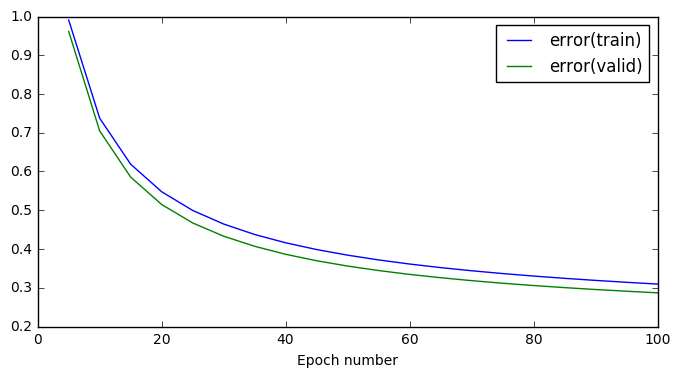

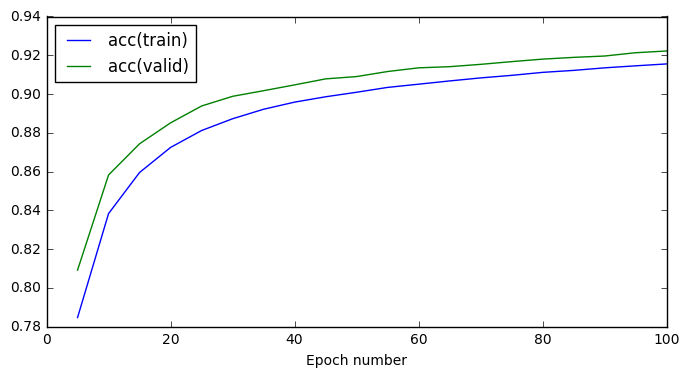

    final error(train) = 3.10e-01
    final error(valid) = 2.87e-01
    final acc(train)   = 9.16e-01
    final acc(valid)   = 9.22e-01
    run time per epoch = 1.55s


In [27]:
#Set training run hyperparameters
batch_size = 50  # number of data points in a batch
num_epochs = 100  # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats
learning_rate = 1e-3  # learning rate for gradient descent
r=10
init_scales = [1]#0.1, 0.2, 0.5, 1.]  # scale for random parameter initialisation
final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []
eps = 1e-3
beta = 0.999
alpha = 0.9
    

for init_scale in init_scales:

    print('-' * 80)
    print('learning_rate={0:.2f} init_scale={1:.2f}'
          .format(learning_rate, init_scale))
    print('-' * 80)
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    # Create a parameter initialiser which will sample random uniform values
    # from [-init_scale, init_scale]
    #param_init = UniformInit(-init_scale, init_scale, rng=rng)

    # Create a model with three affine layers
    #hidden_dim = 100
    model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    # Initialise a cross entropy error object
    error = CrossEntropySoftmaxError()
    schedulers = [sche.ConstantLearningRateScheduler(learning_rate)]
    #schedulers = [sche.Var_momentum_co(mom_coeff=0.6,tau=3,gamma=0)]
    # Use a basic gradient descent learning rule
    #learning_ruleG = GradientDescentLearningRule(learning_rate=learning_rate)
    learning_rule = lr.AdaGrad(learning_rate, eps)
    #learning_rule = lr.Adam(learning_rate, alpha, beta, eps)
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2= train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, schedulers, stats_interval)

    plt.show()

    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])

--------------------------------------------------------------------------------
learning_rate=0.00 init_scale=1.00
--------------------------------------------------------------------------------


Epoch 5: 1.71s to complete
    error(train)=8.60e-02, acc(train)=9.74e-01, error(valid)=1.09e-01, acc(valid)=9.67e-01
Epoch 10: 1.79s to complete
    error(train)=3.85e-02, acc(train)=9.89e-01, error(valid)=8.90e-02, acc(valid)=9.75e-01
Epoch 15: 1.73s to complete
    error(train)=1.75e-02, acc(train)=9.96e-01, error(valid)=8.31e-02, acc(valid)=9.76e-01
Epoch 20: 1.85s to complete
    error(train)=7.14e-03, acc(train)=9.99e-01, error(valid)=8.16e-02, acc(valid)=9.78e-01
Epoch 25: 1.98s to complete
    error(train)=3.40e-03, acc(train)=1.00e+00, error(valid)=8.60e-02, acc(valid)=9.78e-01
Epoch 30: 1.90s to complete
    error(train)=1.66e-03, acc(train)=1.00e+00, error(valid)=8.90e-02, acc(valid)=9.79e-01
Epoch 35: 1.89s to complete
    error(train)=1.11e-03, acc(train)=1.00e+00, error(valid)=9.36e-02, acc(valid)=9.79e-01
Epoch 40: 1.81s to complete
    error(train)=7.45e-04, acc(train)=1.00e+00, error(valid)=9.42e-02, acc(valid)=9.80e-01
Epoch 45: 1.91s to complete
    error(train)=5.69

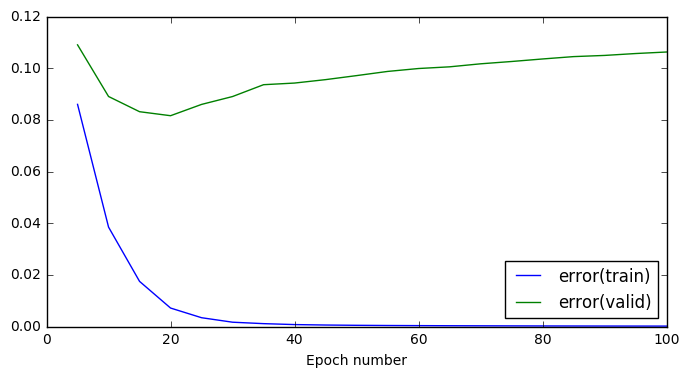

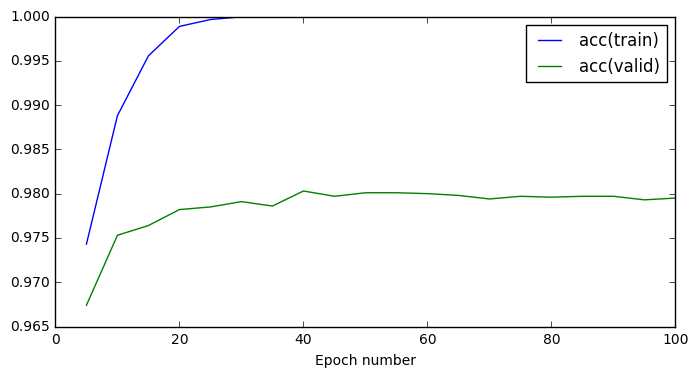

    final error(train) = 1.56e-04
    final error(valid) = 1.06e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.95s


In [35]:
#Set training run hyperparameters
batch_size = 50  # number of data points in a batch
num_epochs = 100  # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats
learning_rate = 1e-3  # learning rate for gradient descent
r=10
init_scales = [1]#0.1, 0.2, 0.5, 1.]  # scale for random parameter initialisation
final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []
eps = 1e-3
beta = 0.99
alpha = 0.1
    

for init_scale in init_scales:

    print('-' * 80)
    print('learning_rate={0:.2f} init_scale={1:.2f}'
          .format(learning_rate, init_scale))
    print('-' * 80)
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    # Create a parameter initialiser which will sample random uniform values
    # from [-init_scale, init_scale]
    #param_init = UniformInit(-init_scale, init_scale, rng=rng)

    # Create a model with three affine layers
    #hidden_dim = 100
    model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    # Initialise a cross entropy error object
    error = CrossEntropySoftmaxError()
    schedulers = [sche.ConstantLearningRateScheduler(learning_rate)]
    #schedulers = [sche.Var_momentum_co(mom_coeff=0.6,tau=3,gamma=0)]
    # Use a basic gradient descent learning rule
    #learning_ruleG = GradientDescentLearningRule(learning_rate=learning_rate)
    #learning_rule = lr.AdaGrad(learning_rate, eps)
    learning_rule = lr.Adam(learning_rate, alpha, beta, eps)
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2= train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, schedulers, stats_interval)

    plt.show()

    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])